<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [169]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [170]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

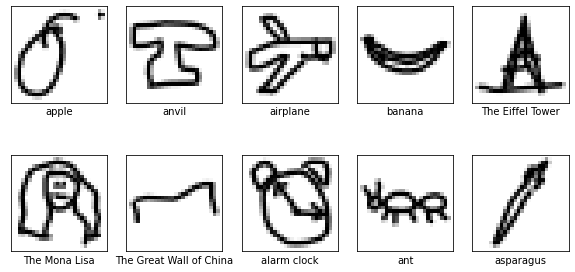

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [172]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [91]:
X.shape

(100000, 784)

In [92]:
print(tf.__version__)

2.0.0


## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [173]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor='val_accuracy', min_delta=.05,patience=5)

def create_model(lr=0.1):
    model = Sequential([
        Dense(32, activation='relu',input_dim=784),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model



In [174]:
model = create_model()
model.summary()

Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_447 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_448 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_449 (Dense)            (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(X,y,batch_size=32,epochs=25,callbacks=[ES],validation_split=.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 56s 694us/sample - loss: 2.3904 - accuracy: 0.2777 - val_loss: 1.6593 - val_accuracy: 0.3871
Epoch 2/25
80000/80000 [==============================] - 34s 430us/sample - loss: 1.5333 - accuracy: 0.4406 - val_loss: 1.4212 - val_accuracy: 0.5038
Epoch 3/25
80000/80000 [==============================] - 37s 462us/sample - loss: 1.2080 - accuracy: 0.5948 - val_loss: 1.1120 - val_accuracy: 0.6562
Epoch 4/25
80000/80000 [==============================] - 34s 424us/sample - loss: 0.9786 - accuracy: 0.6762 - val_loss: 0.9080 - val_accuracy: 0.7066
Epoch 5/25
80000/80000 [==============================] - 42s 529us/sample - loss: 0.8072 - accuracy: 0.7500 - val_loss: 0.7973 - val_accuracy: 0.7650
Epoch 6/25
80000/80000 [==============================] - 43s 533us/sample - loss: 0.7272 - accuracy: 0.7839 - val_loss: 0.7491 - val_accuracy: 0.7860
Epoch 7/25
80000/80000 [====================

Model kind of sucks there is overfitting at five epochs where the training data meets the val

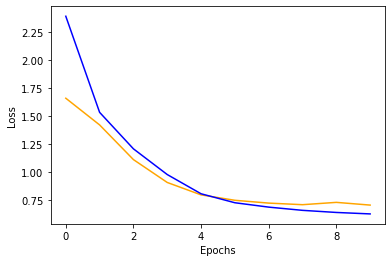

In [96]:

import matplotlib.pyplot as plt 
plt.plot(history.history['val_loss'],color='orange')
plt.plot(history.history['loss'], color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [98]:
history.history

{'loss': [2.390405704021454,
  1.5333341689825057,
  1.207955774950981,
  0.9786432445406914,
  0.8071642167329788,
  0.7271929481089116,
  0.6881627330183983,
  0.6594092860281467,
  0.6406356286287308,
  0.6275634843885899],
 'accuracy': [0.2777375,
  0.440625,
  0.5948375,
  0.6762375,
  0.75,
  0.7839125,
  0.7965375,
  0.8055375,
  0.811375,
  0.815675],
 'val_loss': [1.6592993482589722,
  1.4212197052001954,
  1.1119577843666077,
  0.9079776586055756,
  0.797346556186676,
  0.749127947306633,
  0.7240473276376724,
  0.7098316173553467,
  0.7305670709609985,
  0.7062356249332428],
 'val_accuracy': [0.3871,
  0.50375,
  0.6562,
  0.70655,
  0.765,
  0.78595,
  0.7931,
  0.79735,
  0.7891,
  0.805]}

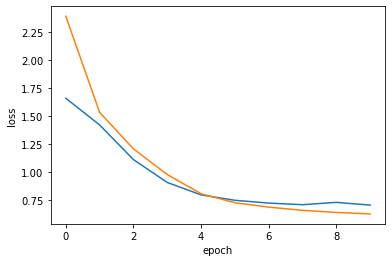

In [99]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(history.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

In [175]:
from tensorflow.keras.callbacks import LearningRateScheduler
def schedule(epoch,initial_lrate):
    decay = 0.01
    new_lrate = initial_lrate/(1 + decay_rate*epoch)
    return new_lrate

In [176]:
l_r = LearningRateScheduler(schedule)

In [ ]:
learning rate too fast

In [181]:
def create_model2(lr=.1):
    model = Sequential([
        Dense(32, activation='relu',input_dim=784),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [182]:
model = create_model2()

history2 = model.fit(X,y,batch_size=32,epochs=8,callbacks=[ES],validation_split=.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/8
80000/80000 [==============================] - 210s 3ms/sample - loss: 2.6710 - accuracy: 0.1003 - val_loss: 2.3012 - val_accuracy: 0.1023
Epoch 2/8
80000/80000 [==============================] - 32s 404us/sample - loss: 2.2594 - accuracy: 0.1205 - val_loss: 2.1782 - val_accuracy: 0.1498
Epoch 3/8
80000/80000 [==============================] - 33s 410us/sample - loss: 2.1244 - accuracy: 0.1738 - val_loss: 2.1066 - val_accuracy: 0.1694
Epoch 4/8
80000/80000 [==============================] - 31s 391us/sample - loss: 1.9587 - accuracy: 0.2406 - val_loss: 1.8697 - val_accuracy: 0.2721
Epoch 5/8
80000/80000 [==============================] - 33s 418us/sample - loss: 1.8289 - accuracy: 0.2860 - val_loss: 1.7680 - val_accuracy: 0.3255
Epoch 6/8
80000/80000 [==============================] - 34s 421us/sample - loss: 1.6918 - accuracy: 0.3490 - val_loss: 1.5930 - val_accuracy: 0.4002
Epoch 7/8
80000/80000 [============================

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [183]:
from tensorflow.keras.optimizers import SGD
SGD = SGD()
def create_model(lr=0.1):
    model = Sequential([
        Dense(32, activation='relu',input_dim=784),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer=SGD,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model
model3 = create_model()
hist = model3.fit(X,y,batch_size=32,epochs=25,callbacks=[ES])

Train on 100000 samples
Epoch 1/25
100000/100000 [==============================] - 68s 676us/sample - loss: 23.3126 - accuracy: 0.0981
Epoch 2/25
100000/100000 [==============================] - 29s 289us/sample - loss: 2.3060 - accuracy: 0.0989
Epoch 3/25
100000/100000 [==============================] - 28s 278us/sample - loss: 2.3027 - accuracy: 0.0992
Epoch 4/25
100000/100000 [==============================] - 27s 271us/sample - loss: 2.3027 - accuracy: 0.0997
Epoch 5/25
100000/100000 [==============================] - 27s 269us/sample - loss: 2.3027 - accuracy: 0.0998
Epoch 6/25
100000/100000 [==============================] - 27s 268us/sample - loss: 2.3027 - accuracy: 0.0986
Epoch 7/25
100000/100000 [==============================] - 32s 323us/sample - loss: 2.3027 - accuracy: 0.0989
Epoch 8/25
100000/100000 [==============================] - 32s 319us/sample - loss: 2.3027 - accuracy: 0.0989
Epoch 9/25
100000/100000 [==============================] - 33s 330us/sample - loss: 2.

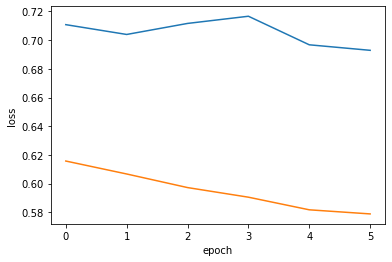

In [107]:
df = pd.DataFrame.from_records(hist.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

The SGD under fits

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)